# 가장 먼 노드

## 문제
n개의 노드가 있는 그래프가 있음. 각 노드는 1부터 n까지 번호가 적혀있음. 1번 노드에서 가장 멀리 떨어진 노드의 갯수를 구하려고 함<br>
가장 멀리 떨어진 노드란 최단경로로 이동했을 때 간선의 개수가 가장 많은 노드들을 의미 <br>
노드의 개수 n, 간선에 대한 정보가 담긴 2차원 배열 vertex가 매개변수로 주어질 때, 1번 노드로부터 가장 멀리 <br>
떨어진 노드가 몇 개인지를 return
<br><br>
input : n = 정수, vertex = 2차원 정수 배열, output : 정수

#### <조건>
 - 노드의 개수 n은 2 이상 20,000 이하
 - 간선은 양방향이며 총 1개 이상 50,000개 이하
 - vertex 배열 각 행 [a, b]는 a번 노드와 b번 노드 사이에 간선이 있다는 의미
 
#### <예시>
input : n = 6, vertex = [[3, 6], [4, 3], [3, 2], [1, 3], [1, 2], [2, 4], [5, 2]]
<br><br>
result : 3
<br><br>
 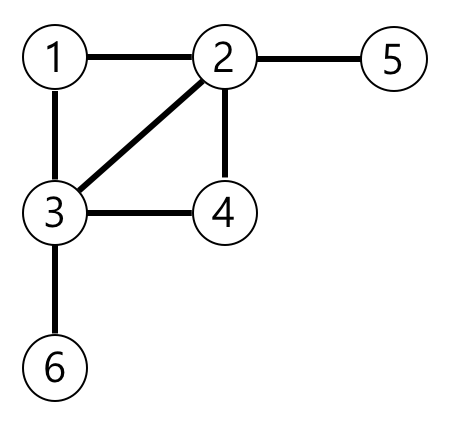
 - 1번 노드에서 가장 멀리 떨어진 노드는 4,5,6번 노드
 - 따라서, 3 return
 
https://programmers.co.kr/learn/courses/30/lessons/49189

## 풀이
### 1.
 - 해당 숫자가 몇 번째 node에 위치하는지 탐색하는 find_num함수 생성
 - 1을 제외한 edge를 돌면서 각 edge의 최저 경로의 노선 수를 return 
   - edge를 넣으면 반복문을 돌면서 1부터 다음 인접 노드를 구함
   - 인접 노드에 내가 찾고자 하는 edge가 있으면 count를 return해줌
 - 모든 edge의 최저 경로의 노선 수를 answer에 저장
 - 최대 값을 찾아서 그 수의 갯수를 return
 
   => 7,8,9 타임 아웃 <br>
   => 반복문을 줄여주는 과정이 필요할 듯
   
### 2. 
 - 그래프의 한층 한층씩 연결된 node를 구해주면서 제일 끝에 연결된 노드를 찾는 방식
 - adj_dict에 그래프의 인접 리스트를 구함
 - bfs 방식을 사용
 - 그래프의 앞으로 거처야하는 node를 start에 저장, visited에 여태 거처온 node저장
   - 이때, start는 이중 리스트로 한 층에 있는 node들을 리스트에 넣음
   - visited는 set으로 만들어줘서 중복되는 요소는 제거
 - node는 start.pop(0)을 해서 현재 층에 있는 모든 node를 리스트로 저장
 - 현재 층에 있는 node들을 돌면서 방문한적이 없는 노드만 visited에 추가해줌
 - node의 인접 리스트를 start에 추가
   - 이때, 현재 node와 방문한 적이 있는 node는 제거하고 추가
   - 현재 층에 있는 node들의 인접 리스트를 추가해줘야하기에 list와 set을 적절하게 이용
 - 그래프의 모든 node를 다 돌 때까지 반복
   - 이때, 반복문을 돌 때마다 answer에 모든 node의 갯수에서 방문한 node의 갯수를 빼서 저장해줌
   - 반복문을 마지막으로 돌 때는 마지막에 들릴 node를 뺀 node만 visited에 저장되어 있을 것이기에 제일 멀리 있는 node의 개수 저장
 - answer return 
 
   => 답을 생각해내는데 너무 오래걸림... <br>
   => 다른 사람들의 힌트로 참고... 분발하쟈ㅠㅜ

In [1]:
# 1.

def solution(n, vertex):
    edge_list = list(set(j for i in vertex for j in i))
    
    adj_dict = {i:[v[1] if v[0] == i else v[0] for v in vertex if i in v] for i in edge_list}

    answer = [find_num(i, adj_dict) for i in edge_list if i != 1]
        
    return answer.count(max(answer))
        
def find_num(num, adj_dict):
    start = [1]
    count = 1

    while (1):
        next_list = list(set(j for i in start for j in adj_dict[i]))
        
        if num in next_list:
            return count
        
        count += 1
        start = next_list

In [2]:
# 2.

def solution(n, vertex):
    adj_dict = dict()
    
    for i in vertex:
        if i[0] not in adj_dict.keys():
            adj_dict[i[0]] = set([i[1]])
        else:
            adj_dict[i[0]].add(i[1])
            
        if i[1] not in adj_dict.keys():
            adj_dict[i[1]] = set([i[0]])
        else:
            adj_dict[i[1]].add(i[0])
    
    start = [[1]]
    visited = set()
    
    while start[0]:
        node = start.pop(0)
        answer = len(adj_dict.keys()) - len(visited)

        add = []
        for i in node:
            if i not in visited:
                visited.add(i)
                
                add += [j for j in adj_dict[i] if j not in visited and j not in node]
                
        start.append(list(set(add)))
 
    return answer

In [3]:
n = 4 
vertex = [[1, 4], [1, 3], [2, 3], [2, 1]]

solution(n, vertex)

3